<a href="https://colab.research.google.com/github/thinkinchicken/food-sales-predictions/blob/main/Sales_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# import linear regression model
from sklearn.linear_model import LinearRegression
# import regression metrics needed from sklearn
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
file_path = "/content/drive/MyDrive/Colab Notebooks/01 Week 1: Python/sales_predictions.csv"
sales_predictions = pd.read_csv(file_path)
sales_predictions.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [123]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

In [124]:
#1) How many rows and columns?
sales_predictions.shape
#8523 rows and 12 columns

(8523, 12)

In [125]:
#2) What are the datatypes of each variable?
sales_predictions.info()
#Shows that datatypes are objects and floats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [126]:
#3) Are there duplicates? If so, drop any duplicates.
sales_predictions.duplicated().any()
#Output says no duplicated data. 

False

In [127]:
#4) Identify missing values.
sales_predictions.info()
# Looks like there are a couple Null values in Item Weight and Outlet Size column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [128]:
#5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).
#Find the range of Item_Weight Column to see how large of a range Item Weight goes across and how much it can vary
print(sales_predictions['Item_Weight'].min())
print(sales_predictions['Item_Weight'].max())
# I will in the NA values for the Item_Weight column with the mean since the range is not that large
sales_predictions['Item_Weight'] = sales_predictions['Item_Weight'].fillna(sales_predictions['Item_Weight'].mean())

4.555
21.35


In [129]:
#Checking if filling the NA values for item weight worked
sales_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [130]:
#For the Outlet_Size column, I would like to check the range of Item_Outlet_Sales range to see if it's comparable to Outlet_Size
print(sales_predictions['Item_Outlet_Sales'].min())
print(sales_predictions['Item_Outlet_Sales'].max())
# I see that the Item Outlet Sales has a pretty broad range

33.29
13086.9648


In [131]:
#Checking the current distrubution and value counts of the Outlet sizes
sales_predictions['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [132]:
#Deciding to fill in the gaps within Outlet_Size as "Missing" so not to skew the data since it is a pretty good chunk that is missing. 
#Also realizing it is a string a simple mean fill or backfill or frontfill will work
sales_predictions['Outlet_Size'] = sales_predictions['Outlet_Size'].fillna('missing')
sales_predictions.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [133]:
#6) Confirm that there are no missing values after addressing them.
sales_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [134]:
#7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent) 
#Checking each individual column that hass an object datatype
sales_predictions['Item_Identifier'].value_counts()  #Good to go
sales_predictions['Item_Fat_Content'].value_counts() #Needs work
sales_predictions['Item_Type'].value_counts() #Good to go
sales_predictions['Outlet_Identifier'].value_counts() #Good to go
sales_predictions['Outlet_Type'].value_counts()  # Good to go

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [135]:
#Working on Item_Fat_Content column because there are inconsistencies
sales_predictions['Item_Fat_Content']= sales_predictions['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat': 'Low Fat'})
#Checking to see if it worked
sales_predictions['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [136]:
#8) For any numerical columns, obtain the summary statistics of each (min, max, mean)
integer_columns = sales_predictions.select_dtypes(include=['float64']).columns
print(integer_columns)
sales_predictions[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']].describe()

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'], dtype='object')


,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,2181.288914
std,4.226124,0.051598,62.275067,1706.499616
min,4.555000,0.000000,31.290000,33.290000
25%,9.310000,0.026989,93.826500,834.247400
50%,12.857645,0.053931,143.012800,1794.331000
75%,16.000000,0.094585,185.643700,3101.296400
max,21.350000,0.328391,266.888400,13086.964800


#Part 3

Text(0, 0.5, 'Count')

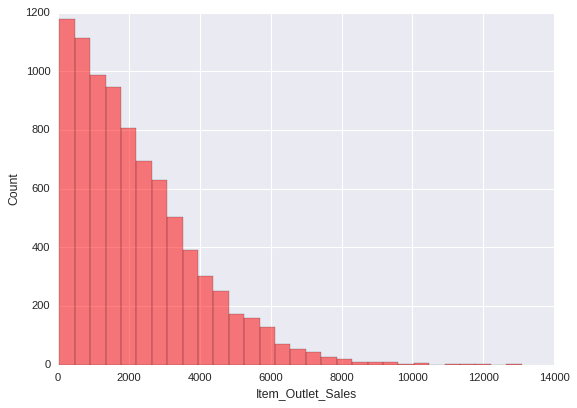

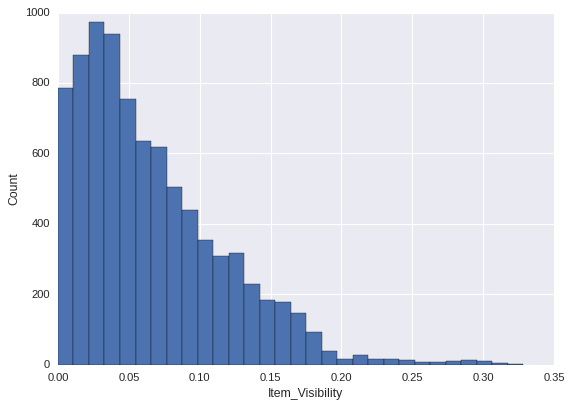

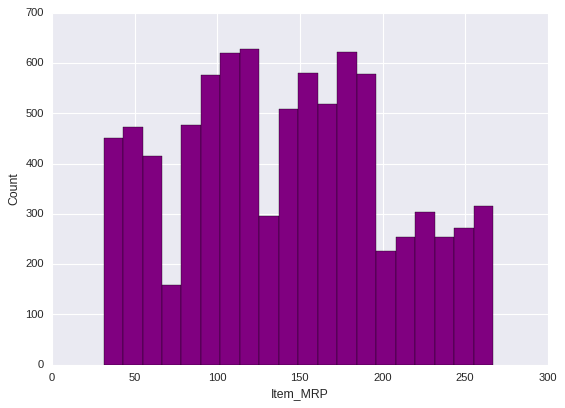

In [137]:
 
##Let's try histograms of a couple of the columns and see what we get
#Checking the column names to see what the potential is to plot
sales_predictions.head()
#Deciding on Item Outlet Sales and Item Visibility and plotting into two different histograms. 
#Considering Item MRP as well to see what that may look like. Unsure of what MRP is
#Seems like there is a strong correlation between the two but will check later with heat map

fig1 = plt.figure()
plt.hist(sales_predictions['Item_Outlet_Sales'], bins = 30, edgecolor =  'black', alpha = 0.5, label = 'Item Sales', color = 'red')
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Count')
fig2 = plt.figure()
plt.hist(sales_predictions['Item_Visibility'], bins = 30, edgecolor = 'black',alpha =1, label = 'Item Visibility')
plt.xlabel('Item_Visibility')
plt.ylabel('Count')
fig3 = plt.figure()
plt.hist(sales_predictions['Item_MRP'], bins = 20, edgecolor = 'black', label = 'Item MRP', color = 'purple')
plt.xlabel('Item_MRP')
plt.ylabel('Count')


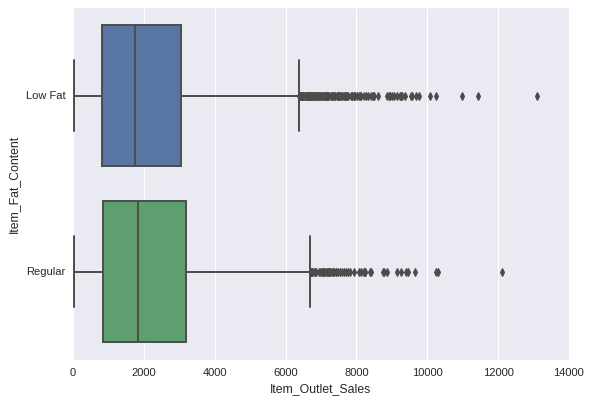

In [138]:
# Plotting box plots but checking column names first to see what our options are
sales_predictions.head()
#Let's check out Location Type, Item Type, Item Fat Content
#Plot of Item Fat Content and the distribution of sales for each
#Pretty equal distribution between Low Fat and Regular item types

sns.boxplot(x=sales_predictions['Item_Outlet_Sales'], y = sales_predictions['Item_Fat_Content']);


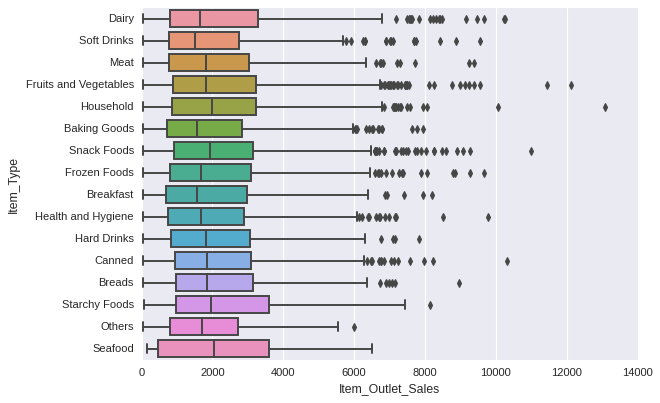

In [139]:
#Box plotting Item Type and sales distribution for each type of item
#No one food type seems like it stands out by a lot from the group
#There are some pretty big outliers in Baking Goods  and Friots and vegetables. 
sns.boxplot(x=sales_predictions['Item_Outlet_Sales'], y = sales_predictions['Item_Type']);

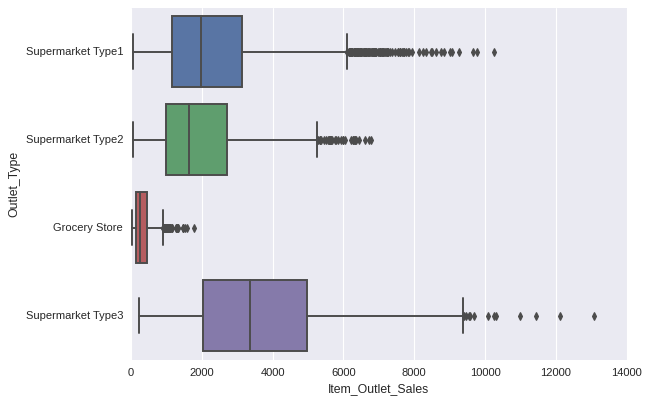

In [140]:
#Box plotting Location Type and Item sales for each
#Looks like the grocery store has the fewest item sales while the super market type 3 has the most. Super market Type 1 looks like it amy have a lot of outliers
sns.boxplot(x=sales_predictions['Item_Outlet_Sales'], y = sales_predictions['Outlet_Type']);


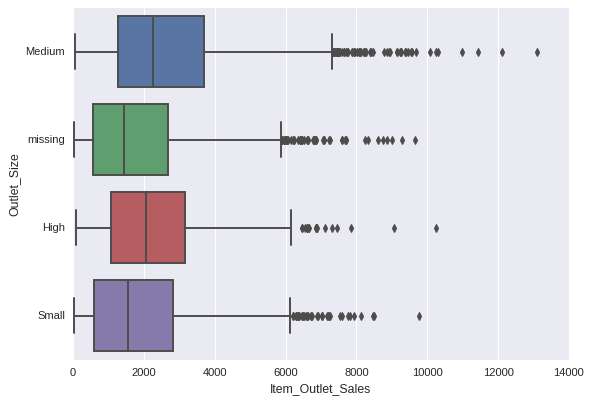

In [141]:
#Might be worth comparing the supermarket type sales and the outlet size sales too
#Taking a look, it is interesting to see that sales across the different sizes of outlet stores is within the same range. There are more outliers in the Medium store, and seemingly more sales in the medium stores
#but not that significant
sns.boxplot(x=sales_predictions['Item_Outlet_Sales'], y = sales_predictions['Outlet_Size']);

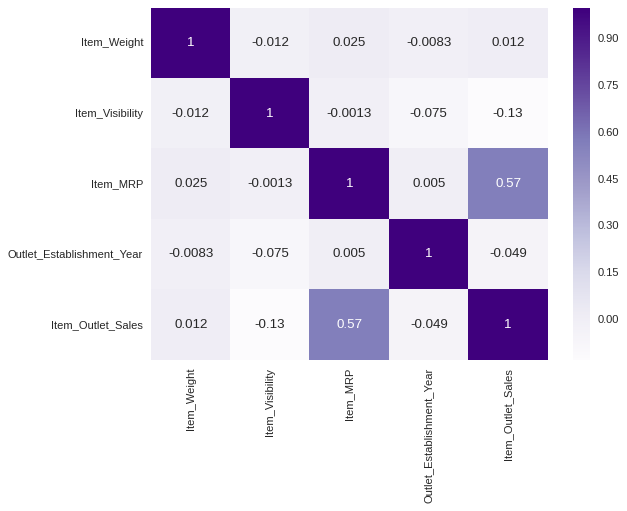

In [142]:
#In this case may be worth seeing if there is a correlation between size sales and supermarket type
corr = sales_predictions.corr()
sns.heatmap(corr, cmap = 'Purples', annot = True);
#Interesting to see there is some correclation between Item _MRP and Item Outlet Sales. 
#Other interesting point is that although the histograms for Item visibility and Item Outlet Sales seem similar, there is not a strong correlation between the two. There is actually close to none. 


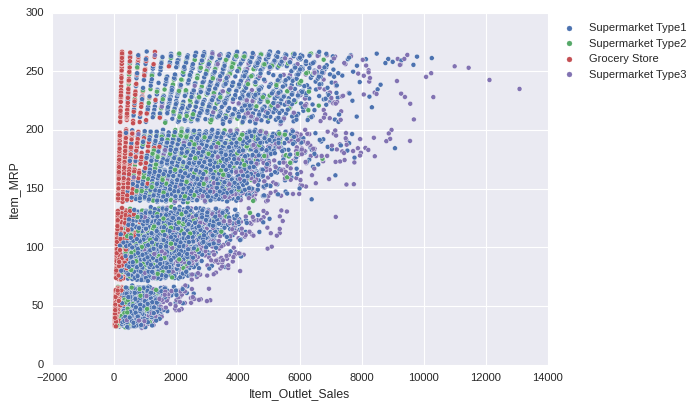

In [143]:
#Doing a scatter plot and then using color to see if sny categorical type column gives any insight to this correlation
sns.scatterplot(x = 'Item_Outlet_Sales', y = 'Item_MRP', data = sales_predictions, hue = 'Outlet_Type' )
plt.legend(bbox_to_anchor = (1,1), loc = 'upper left');
#Outlet type Supermarket Type 3 looks promising for some correlation analysis

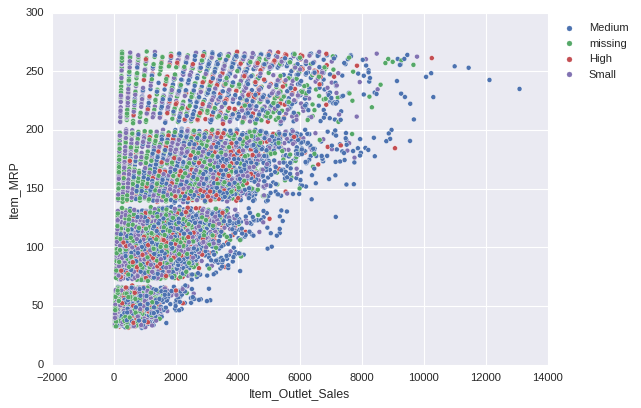

In [144]:
#checking to see if Outlet size has any similarities
#output shows that the general distribution is relatively similar but not as strong a correlation as we see in the scatterplot of the Outlet type
sns.scatterplot(x = 'Item_Outlet_Sales', y = 'Item_MRP', data = sales_predictions, hue = 'Outlet_Size' )
plt.legend(bbox_to_anchor = (1,1), loc = 'upper left');

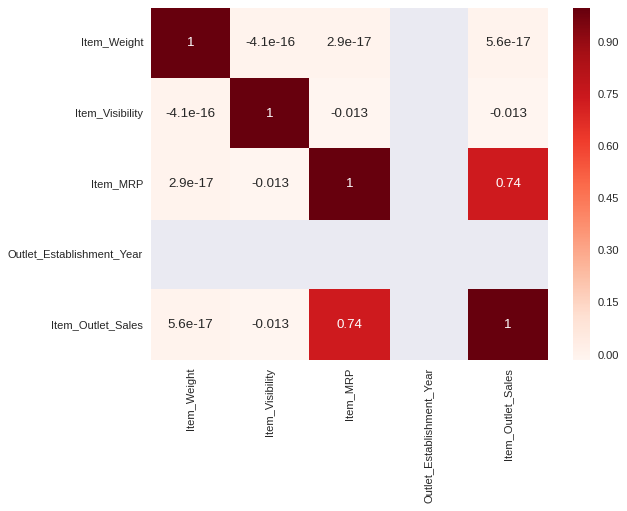

In [145]:
#Creating a filter for Supermarket type 3
#Plotting the correlation heat map and scatterplot for supermarket type 3 
#output once again shows strong correlation between MRP and Item Sales
type_3 = sales_predictions.loc[sales_predictions['Outlet_Type']== 'Supermarket Type3',:]
corr = type_3.corr()
sns.heatmap(corr, cmap = 'Reds', annot = True);


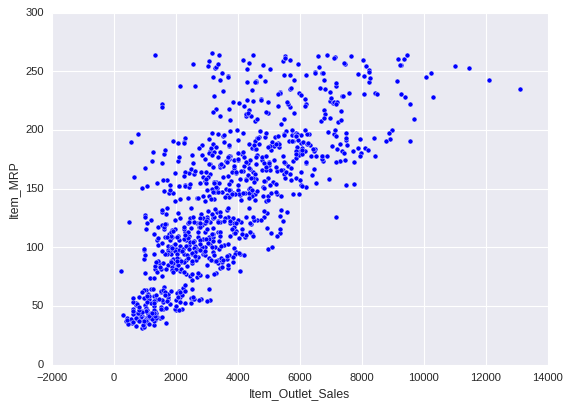

In [146]:
#Scatterplot of supermarket type 3 outlet sales and item MRP
#Some correlation shown
sns.scatterplot(x = 'Item_Outlet_Sales', y = 'Item_MRP', data = type_3)

# Part 4

In [147]:
#Revisiting the data and columns
sales_predictions.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Will look into top sales by item type and filter for each outlet type

In [148]:
#Filter for market grocery type
groc = sales_predictions.loc[sales_predictions['Outlet_Type']== 'Grocery Store']
#Filter for market type1
type1 = sales_predictions.loc[sales_predictions['Outlet_Type']== 'Supermarket Type1']
#Filter for market type2
type2 = sales_predictions.loc[sales_predictions['Outlet_Type']== 'Supermarket Type2']
#Filter for market type3
type3 = sales_predictions.loc[sales_predictions['Outlet_Type']== 'Supermarket Type3']

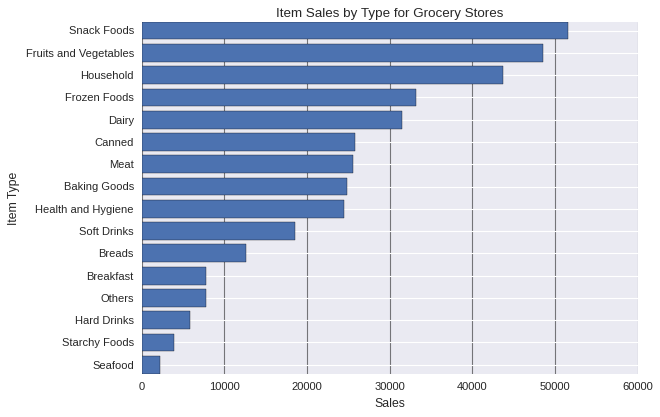

In [149]:
#Starting with Grocery store and seeing top item sales by item type
groc_sales = groc.groupby('Item_Type')['Item_Outlet_Sales'].sum().reset_index(name = 'Sum Sales').sort_values('Sum Sales', ascending = True)
plt.style.use('seaborn')
plt.barh(groc_sales['Item_Type'], groc_sales['Sum Sales']);
plt.title('Item Sales by Type for Grocery Stores')
plt.grid(axis = 'x', color = 'black', alpha = 0.5)
plt.xlabel('Sales')
plt.ylabel('Item Type');

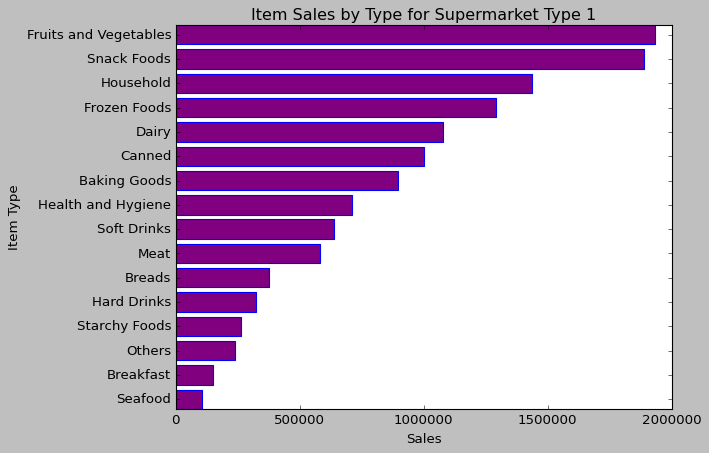

In [150]:
#Now checking Type 1 Super market
type1_sales = type1.groupby('Item_Type')['Item_Outlet_Sales'].sum().reset_index(name = 'Sum Sales').sort_values('Sum Sales', ascending = True)
plt.style.use('classic')
plt.barh(type1_sales['Item_Type'], type1_sales['Sum Sales'], color = 'Purple', edgecolor = 'blue');
plt.title('Item Sales by Type for Supermarket Type 1')
plt.xlabel('Sales')
#plt.ticklabel_format(style='plain') 
plt.ylabel('Item Type');

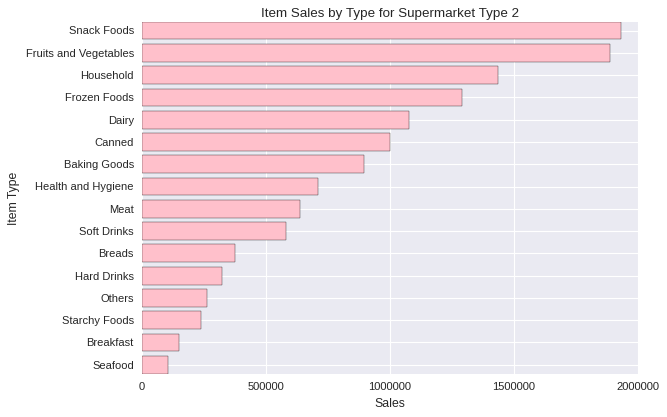

In [151]:
#Now checking Type 2 Super market
type2_sales = type2.groupby('Item_Type')['Item_Outlet_Sales'].sum().reset_index(name = 'Sum Sales').sort_values('Sum Sales', ascending = True)
plt.style.use('seaborn')
plt.barh(type2_sales['Item_Type'], type1_sales['Sum Sales'], color = 'Pink');
plt.title('Item Sales by Type for Supermarket Type 2')
plt.xlabel('Sales') 

plt.ylabel('Item Type');

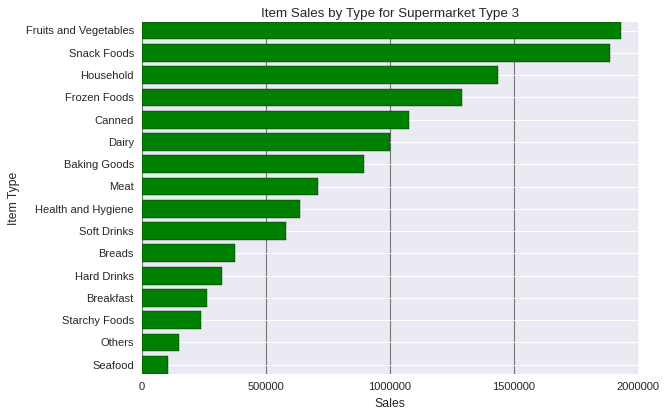

In [152]:
#Now checking Type 3 Super market
type3_sales = type3.groupby('Item_Type')['Item_Outlet_Sales'].sum().reset_index(name = 'Sum Sales').sort_values('Sum Sales', ascending = True)
plt.style.use('seaborn')
plt.barh(type3_sales['Item_Type'], type1_sales['Sum Sales'], color = 'Green');
plt.title('Item Sales by Type for Supermarket Type 3')
plt.xlabel('Sales')
plt.grid(axis = 'x', color = 'black', alpha = 0.5)
plt.ylabel('Item Type');

Fruits and vegetables, Household, Frozen Foods, Snack Foods and Dairt seem to all be common top sales items in each of these different types of outlets

When I see the column'Item Fat Content' I immediately think of Dairy items.. Wonder if the fat content of dairy is meaningful and to see the distribution of sales is more for one than the other

In [153]:
#Filtering sales data by dairy items only
dairy = sales_predictions.loc[sales_predictions['Item_Type']== 'Dairy']

In [154]:
#Revisiting the different value counts of what falls under the fat type
dairy['Item_Fat_Content'].value_counts()
#Creating a filter for both Low Fat and Regular
lf = dairy.loc[dairy['Item_Fat_Content']== 'Low Fat']
reg = dairy.loc[dairy['Item_Fat_Content']== 'Regular']


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


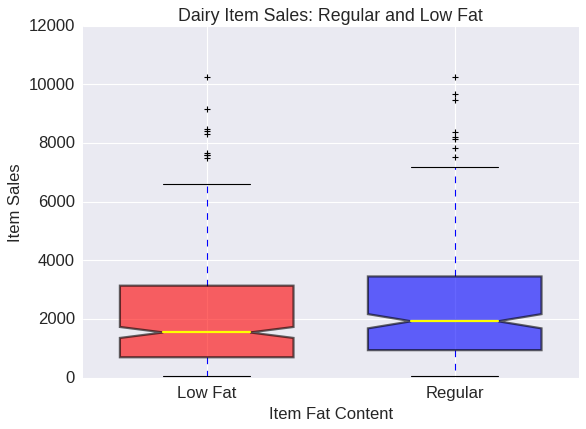

In [155]:
fig, axes = plt.subplots(nrows = 1, ncols = 1)
plt.ylabel('Item Sales', fontsize = 15);
plt.xlabel('Item Fat Content', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Dairy Item Sales: Regular and Low Fat', fontsize = 16)
boxplots = axes.boxplot([lf['Item_Outlet_Sales'],reg['Item_Outlet_Sales']],        
           notch = True,
           labels=['Low Fat', 'Regular'],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='-', linewidth=2, color='Black', facecolor = 'blue', alpha = .6));
boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('red');


Looks like regular fat dairy items have slightly higher item sales than low fat but not significantly so

# Part 5

In [156]:
sales_predictions.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [157]:
#Checking to see which columns need dummy one hot encodes
sales_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [158]:
ohe_df = pd.get_dummies(sales_predictions, columns = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type',  'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'], drop_first = True)
ohe_df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,Item_Identifier_DRC13,Item_Identifier_DRC24,Item_Identifier_DRC25,Item_Identifier_DRC27,Item_Identifier_DRC36,Item_Identifier_DRC49,Item_Identifier_DRD01,Item_Identifier_DRD12,Item_Identifier_DRD13,Item_Identifier_DRD15,Item_Identifier_DRD24,Item_Identifier_DRD25,Item_Identifier_DRD27,Item_Identifier_DRD37,Item_Identifier_DRD49,Item_Identifier_DRD60,Item_Identifier_DRE01,Item_Identifier_DRE03,Item_Identifier_DRE12,Item_Identifier_DRE13,Item_Identifier_DRE15,Item_Identifier_DRE25,Item_Identifier_DRE27,Item_Identifier_DRE37,Item_Identifier_DRE48,Item_Identifier_DRE49,...,Item_Identifier_NCZ18,Item_Identifier_NCZ29,Item_Identifier_NCZ30,Item_Identifier_NCZ41,Item_Identifier_NCZ42,Item_Identifier_NCZ53,Item_Identifier_NCZ54,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_missing,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [159]:
#Assigning the X variables
X = ohe_df.drop(columns = 'Item_Outlet_Sales')    

In [160]:
#Assigning the y variable of sales, our target
y = ohe_df.loc[:, 'Item_Outlet_Sales'].values

In [161]:
X.shape


(8523, 1595)

In [162]:
y.shape

(8523,)

In [163]:
#Splitting into train and test  groups
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [164]:
len(X_train)

6392

In [165]:
len(X_test)

2131

In [166]:
#Creating a linear regression instance
reg = LinearRegression(fit_intercept = True)

In [167]:
#Instantiate the model and fitting the training data
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [168]:
#Instantiate the model and fitting the test data
reg.fit(X_test, y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [169]:
#from sklearn.preprocessing import StandardScaler 
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test) 


In [170]:
#Saving predictions for test set
test_preds = reg.predict(X_test)
train_preds = reg.predict(X_train)

In [171]:
#Evaluate test set results using r2
print('Test R2: ', reg.score(X_test, y_test))

#Using sklearn:
r2_score(y_test, test_preds)

Test R2:  0.8203479277678242


0.8203479277678242

In [172]:
#Comparing test and train sets R2 values
print(reg.score(X_test, y_test))
print(reg.score(X_train, y_train))
#Is the large R2 squared value for the train set an indication of overfitting? 
#This may mean we need to select only a couple of features to predict sales.
#Will retry with a new model but with fewer features

0.8203479277678242
-5.157890152135062e+17


In [173]:
#Using a correlation heatmap to decide which features to use
ohe_df.corrwith(ohe_df['Item_Outlet_Sales']).sort_values(ascending = False)

Item_Outlet_Sales                1.000000
Item_MRP                         0.567574
Outlet_Type_Supermarket Type3    0.311192
Outlet_Identifier_OUT027         0.311192
Outlet_Size_Medium               0.204701
                                   ...   
Outlet_Establishment_Year       -0.049135
Outlet_Size_Small               -0.098403
Item_Visibility                 -0.128625
Outlet_Size_missing             -0.131973
Outlet_Identifier_OUT019        -0.277250
Length: 1596, dtype: float64

Looks like Item MRP is still the top correlation with Item Outlet sales target variable. May just use that as the only feature in the new model

In [174]:
#y remains the same so let's create a new X variable
X1 = ohe_df.loc[:,['Item_MRP']].values 

In [175]:
#Splitting the data yet again into train and test 
X1_train, X1_test, y_train, y_test = train_test_split(X1,y,random_state = 42)

In [176]:
#Creating a new linear regression instance
reg2 =  LinearRegression(fit_intercept = True)

In [177]:
#Instantiate the model and fitting the training data
reg2.fit(X1_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [178]:
#Instantiate the model and fitting the test data
reg2.fit(X1_test, y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [179]:
#Saving predictions for test set
test1_preds = reg2.predict(X1_test)
train1_preds = reg2.predict(X1_train)


In [180]:
#Comparing test and train sets R2 values
print(reg2.score(X1_test, y_test))
print(reg2.score(X1_train, y_train))

0.3235927522892206
0.3201913699969102


The scores are much more similar now but Item MRP only accounts for about 32% of the variability in Item Outlet sales. 

In [181]:
#Evaluate the RMSE
#Mean Squared error first of test set
preds = reg2.predict(X1)
MSE = mean_squared_error(y,preds)
#Root Mean Squared Error RMSE
RMSE = np.sqrt(MSE)
print(RMSE)

1405.5039777902919


On average, our model is incorrect by about 1,405 dollars. Which is a lot considering the range of sales found in the Item Outlet Sales column. There is certainly room for improvement

# Final Part

In [182]:
#Building a simple decision tree model
#Taking a relook at  the data and deciding which features may make the most sense in keeping
sales_predictions.head()
sales_predictions.shape

(8523, 12)

In [183]:
#We have a one hot encoded data set all ready to go to do a decision tree model. let's give it a shot
#X and y are already defined above
#Make an instance of the model 
dec_tree = DecisionTreeRegressor(random_state = 42)
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [184]:
#Evaluate the model
train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test, y_test)
print(train_score)
print(test_score)

1.0
0.216939546840761


Clearly an overfit since the test data set performed poorly and the training data set performed perfectly

In [185]:
#Let's check how deep the tree when by default and how many leaf nodes
print(dec_tree.get_depth())
print(dec_tree.get_n_leaves())

66
6191


In [186]:
#Let's see if we can optimize the max depth based on the R2 score
max_depth_range = list(range(2, 36)) # will try every value between 2 and 36
# List to store the score for each value of max_depth:
r2 = []
for depth in max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth = depth, 
                             random_state = 42)
    dec_tree.fit(X_train, y_train)
    score = dec_tree.score(X_test, y_test)
    r2.append(score)

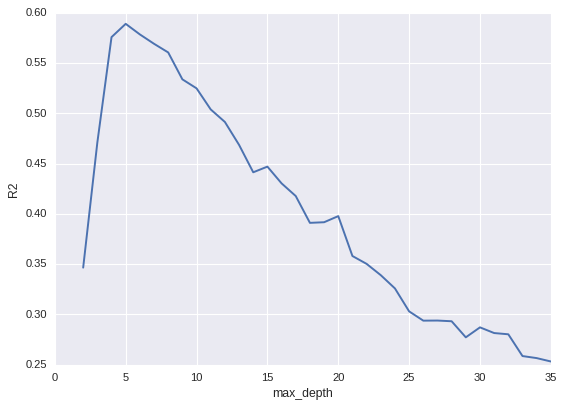

In [187]:
# Visualize which max_depth leads to the highest r2 score
import matplotlib.pyplot as plt
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');

From the graph we see that the R2 value doesn't really get any better than 0.59 but it is optimized at around a depth of 5. Let's run that to see how it goes 


In [188]:
#Max depth looks like it is around 5
# Run the model with our optimized value for max_depth
dec_tree_5 = DecisionTreeRegressor(max_depth = 5, random_state = 42)
dec_tree_5.fit(X_train, y_train)
train_5_score = dec_tree_5.score(X_train, y_train)
test_5_score = dec_tree_5.score(X_test, y_test)
print(train_5_score)
print(test_5_score)

0.6122318361448813
0.588890582401477


At least with this fixed depth, the training and test data set are much closer and it is a much better fit than the previous linear regression model

Moving on to build and evaluate a bagged tree model 


In [189]:
bt = BaggingRegressor()
bt.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [190]:
# training R2
bt_train_score=bt.score(X_train, y_train)
# testing R2
bt_test_score = bt.score(X_test, y_test)

print(bt_train_score)
print(bt_test_score)

0.9166098343594062
0.5285025760946034


Another case of where we see the training score do much better than the test score. However,it is still much better than the linear regression model


Giving the Random Forest model a go

In [191]:
rf = RandomForestRegressor(random_state = 42)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [192]:
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print(rf_train_score)
print(rf_test_score)

0.9374364443925687
0.5544558872144547


So with the random forest we do slightly better than the bagged trees. Let's see if we can further tune the random forests model


In [193]:
#Checking the depths
[estimator.get_depth() for estimator in rf.estimators_]

[61,
 61,
 53,
 59,
 53,
 48,
 63,
 54,
 65,
 59,
 65,
 53,
 60,
 64,
 62,
 60,
 64,
 61,
 52,
 52,
 75,
 57,
 46,
 58,
 63,
 58,
 57,
 62,
 48,
 75,
 48,
 69,
 55,
 60,
 61,
 58,
 56,
 74,
 48,
 58,
 62,
 57,
 60,
 52,
 52,
 54,
 55,
 68,
 49,
 60,
 56,
 55,
 47,
 51,
 64,
 69,
 48,
 70,
 49,
 58,
 54,
 62,
 67,
 68,
 62,
 55,
 57,
 57,
 60,
 70,
 59,
 58,
 48,
 63,
 57,
 49,
 59,
 56,
 62,
 57,
 59,
 79,
 56,
 52,
 64,
 57,
 59,
 61,
 57,
 58,
 57,
 59,
 65,
 61,
 50,
 73,
 54,
 60,
 56,
 68]

In [194]:
#We know that the max_depth of 5 helped us earlier, let's see if it can help us with random forests as well
rf_5 = RandomForestRegressor(max_depth = 5, random_state = 42)
rf_5.fit(X_train, y_train)
rf_5_train_score = rf_5.score(X_train, y_train)
rf_5_test_score = rf_5.score(X_test, y_test)
print(rf_5_train_score)
print(rf_5_test_score)

0.6213276109216528
0.6066122404119114


Ok. We see an imporovement from the decision tree model. Slighlty though and not much. It does help with the overfitting issue as well. 
Let's see what happens if we use 200 trees and a max depth of 5

In [197]:
rf_200 = RandomForestRegressor(n_estimators = 200,max_depth = 5, random_state = 42)
# Fit the model
rf_200.fit(X_train, y_train)
# Obtain the scores
rf_200_train_score = rf_200.score(X_train, y_train)
rf_200_test_score = rf_200.score(X_test, y_test)
print(rf_200_train_score)
print(rf_200_test_score)

0.6210067076750116
0.6068290935497023


Again, not much different from the max depth 5 and 100 trees. 

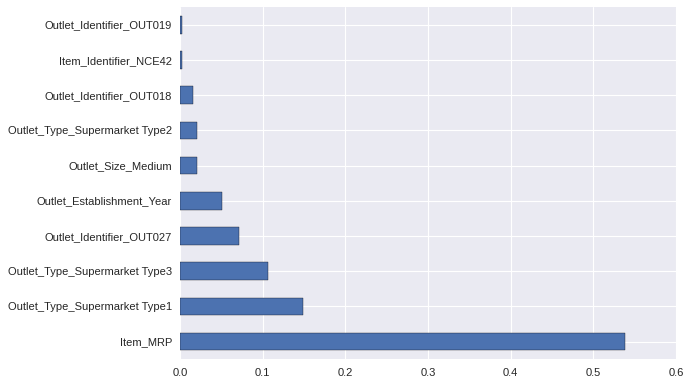

In [200]:
#Let's look into which features are the most important in this model
feat_importances = pd.Series(rf_5.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')

It's clear that Item MRP continues to be a large correlation and important feature to predicting item outlet sales.

In conclusion and after running through all four of these models, I would recommend either the Regression Decision Tree model or the Random Forests Model. Both show promise in the R2 values. Although they aren't perfect, the training and test scores for these models are relatively close, which suggests that predicting on the test set is pretty on par with the training set. These two models(Regression decision tree & Random forests) also do much better than the simple linear regression model, where the R2 value for the test set proved it was unsuccessful at predictions. 